# Descriptive Statistics of Degrees of Freedom


In [1]:
# Basic imports and setup.

import sys
import logging
from pathlib import Path

%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import seaborn as sns

from neuropsymodelcomparison.dataprocessing import analysis
from neuropsymodelcomparison import plot

pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Default file format for figures.
pio.kaleido.scope.default_format = "pdf"
pio.templates.default = "plotly_white"

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

Get preprocessed trials data.

In [2]:
data_path = Path('../data/preprocessed')
reports_path = Path('../reports')
figures_path = reports_path / 'figures'

trials_filepath = data_path / 'trials.csv'
df = pd.read_csv(trials_filepath, index_col='id', dtype={'outlier': bool, 'exclude': bool})
# Clear outliers and excluded trials.
df = df.loc[~(df['outlier'] | df['exclude'])].drop(['outlier', 'exclude'], axis='columns')
# Easier on memory and faster groupby.
df[['user', 'session', 'block', 'block_id', 'condition', 'task']] = df[['user', 'session', 'block', 'block_id', 'condition', 'task']].astype('category')

# When we view statistics by task, we want them to to be displayed in a certain order.
task_display_order = ['pre', 'df1', 'df2', 'df1|df2', 'post']
df.task.cat.reorder_categories(task_display_order, inplace=True)
condition_display_order = ['df1', 'df2', 'df1|df2']
df.condition.cat.reorder_categories(condition_display_order, inplace=True)

## Analysis of Slider Usage

Onset of sliders for df1 and df2 being grabbed.

In [64]:
fig_onset = plot.generate_violin_figure(df[['user', 'condition', 'block', 'task', 'df1_grab', 'df2_grab']].rename(columns={'df1_grab': 'df1', 'df2_grab': 'df2'}), ['df1', 'df2'], ytitle="Grab Onset (s)", legend_title="DOF", width=800)
fig_onset.show()
        


The distributions of the onset of grabbing the slider handles for each task appear to be bell-shaped with long tails. Let's have a look at the statistics.

In [65]:
onset_stats = df.groupby('task', sort=False)[['df1_grab', 'df2_grab']].describe().stack(level=0).T[task_display_order]
onset_stats

task        pre                 df1                 df2             df1|df2  \
       df1_grab  df2_grab  df1_grab  df2_grab  df1_grab  df2_grab  df1_grab   
25%     0.35611   0.36973   0.36008   0.38060   0.25862   0.26726   0.34201   
50%     0.45315   0.46336   0.43721   0.46679   0.35480   0.36785   0.43028   
75%     0.56884   0.57592   0.66354   0.67783   0.54784   0.53700   0.52634   
count 833.00000 833.00000 166.00000 166.00000 210.00000 210.00000 437.00000   
max     1.44165   1.43073   1.43795   1.56986   1.27050   1.26356   1.26792   
mean    0.47754   0.49122   0.52338   0.54464   0.40571   0.40841   0.44938   
min     0.02409   0.00040   0.05188   0.00060   0.04185   0.04174   0.05636   
std     0.19486   0.19984   0.25678   0.25636   0.21916   0.19715   0.16620   

task                 post            
       df2_grab  df1_grab  df2_grab  
25%     0.35029   0.30070   0.30817  
50%     0.44198   0.38938   0.40546  
75%     0.54063   0.51592   0.51771  
count 437.00000 843.00000 843.00000  
max     1.23378   1.27435   1.33582  
mean    0.46362   0.42856   0.44018  
min     0.03384   0.00043   0.00034  
std     0.16235   0.20166   0.20157

Duration of sliders for df1 and df2 being grabbed.

In [66]:
fig_duration = plot.generate_violin_figure(df[['user', 'condition', 'block', 'task', 'df1_duration', 'df2_duration']].rename(columns={'df1_duration': 'df1','df2_duration': 'df2'}), ['df1', 'df2'], ytitle='Grab Duration (s)', legend_title="DOF", autosize=False, width=800)
fig_duration.show()

In [67]:
duration_stats = df.groupby('task', sort=False)[['df1_duration', 'df2_duration']].describe().stack(level=0).T[task_display_order]
duration_stats

task           pre                       df1                       df2  \
      df1_duration df2_duration df1_duration df2_duration df1_duration   
25%        1.25623      1.22306      1.40341      1.35852      1.35852   
50%        1.49012      1.46670      1.61628      1.57539      1.65836   
75%        1.63607      1.62297      1.70469      1.68515      1.81756   
count    833.00000    833.00000    166.00000    166.00000    210.00000   
max        2.03571      2.03583      2.02585      2.05330      2.04588   
mean       1.44297      1.41915      1.53765      1.51227      1.55655   
min        0.22057      0.29653      0.64561      0.51370      0.50479   
std        0.27042      0.27710      0.25050      0.25668      0.34067   

task                    df1|df2                      post               
      df2_duration df1_duration df2_duration df1_duration df2_duration  
25%        1.41538      1.40330      1.34671      1.29052      1.25758  
50%        1.65869      1.58959      1.56378      1.55344      1.51316  
75%        1.79533      1.70081      1.68596      1.69170      1.68040  
count    210.00000    437.00000    437.00000    843.00000    843.00000  
max        2.04601      2.02029      2.02056      2.04764      2.04752  
mean       1.56116      1.53748      1.49056      1.47902      1.45769  
min        0.79064      0.27626      0.25717      0.41882      0.15816  
std        0.31324      0.24288      0.28090      0.28354      0.28761

## Normality Inspections
### QQ-Plots
QQ-plots for comparing final states distribution of degrees of freedom to normal distributions.

The Filliben’s formula was used to estimate the theoretical quantiles for all QQ-plots.

In [68]:
fig_qq_dof = plot.generate_qq_plot(df, vars_=['df1', 'df2'], width=800)
fig_qq_dof.show()


#### Separately

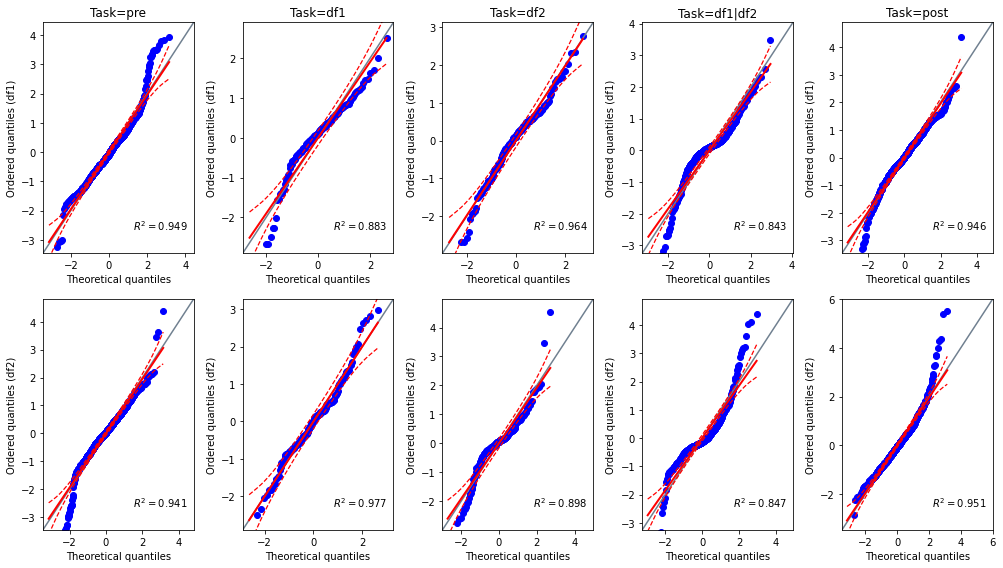

In [69]:
import pingouin as pg
import matplotlib.pyplot as plt

fig_qq_grid, axes = plt.subplots(2, len(task_display_order), figsize=(14, 8))
for i, task in enumerate(task_display_order):
    pg.qqplot(df[df['task'] == task]['df1'], dist='norm', ax=axes[0, i])
    pg.qqplot(df[df['task'] == task]['df2'], dist='norm', ax=axes[1, i])
    axes[0, i].set(ylabel='Ordered quantiles (df1)', title=f"Task={task}")
    axes[1, i].set(ylabel='Ordered quantiles (df2)', title="")
fig_qq_grid.tight_layout()
plt.savefig(reports_path / 'figures/qq-plot-dof-grid.pdf')

plt.show()

The visual inspection of the QQ-plots show deviances from normal distributions, especially in the lower and higher quantiles.

### Histograms
Histograms of final state values for df1 and df2 compared to normal distributions.

In [70]:
# Collect all histograms in a dictionary for later use of the keys as part of their file name when saving.
histograms = dict()

histograms['overall_dof'] = plot.generate_histograms(df[['df1', 'df2']], x_title="Final State Values", legend_title="DOF", width=600, height=300)
histograms['overall_dof'].show()

The distributions of overall final state values of the degrees of freedom appear to have the form of skewed bell-shapes, but deviate from normal distributions. Let's see if these distributions are also found when looking at the indiviual tasks.

In [71]:
for task, group in df.groupby('task', sort=False):
    histograms[task] = plot.generate_histograms(group[['df1', 'df2']], x_title=f"Final State Values for Task \"{task}\"", legend_title="DOF", width=600, height=300, xaxis_range=[0, 100])

for task in task_display_order:
    histograms[task].show()


In [35]:
final_state_stats = df.groupby(['user', 'task'], observed=True)[['df1', 'df2','sum']].agg(['mean', 'std']).groupby(['task']).mean().swaplevel(axis='columns').sort_index(axis=1).sort_index(axis=0).rename(columns={'mean': 'Mean', 'std': 'Std', 'sum': 'Sum'}).rename_axis('Task')
final_state_stats

Mean                        Std                
             df1      df2       Sum     df1     df2     Sum
Task                                                       
pre     60.45430 63.86778 124.32208 3.50531 3.36734 3.07183
df1     61.45071 64.98720 126.43791 3.31481 6.94186 7.12507
df2     59.37766 62.49239 121.87005 6.92441 3.98711 7.29322
df1|df2 61.52884 63.33204 124.86088 3.93631 3.68596 5.16150
post    59.31367 65.10123 124.41490 3.30260 3.36109 2.34970

No visually discernible difference exists between the pre and post test.  
Very notable is the presence of clear differences between the tasks in the treatment block, even though the solution to these tasks are all identical. This finding suggests an influence of the instructions and feedback given on the employed motor strategy. When the visual feedback about the additional task was only given for one slider, the variability of this degree of freedom was reduced compared to unconstrained tasks in the pre- and post tests, whereas the variability of final state values for the other slider weren't diminished.  
When feedback was present for both sliders, both their final state variability were reduced to an approximally equal level.  
In the post test when there were no more additional constraints on the task, the variability of previously constrained degrees of freedom increased compared to the treatment block.

An overall tendency can be seen for higher mean values of degree of freedom 2 over degree of freedom 1. The slider for DoF2 was placed on the right side of the display and it's assumed that the majority of participants were right handed. One way to interpret the difference is that the dominant hand is used to drive the sought after change more strongly.

The solution to the treatment tasks is that both degrees of freedom are at 62.5.

###   Per degree of freedom and participant. Vertical bars represent standard deviations.

In [73]:
df_block_stats = pd.read_csv(reports_path / 'block_stats.csv', index_col='block_id', dtype={'exclude': bool})
df_block_stats = df_block_stats.loc[~df_block_stats['exclude']].drop('exclude', axis='columns')
df_block_stats.head()

user  session condition  block     task  count  df1 mean  \
block_id                                                             
28           9        1   df1|df2      1      pre     28  57.28674   
29           9        1   df1|df2      2  df1|df2     29  61.34115   
30           9        1   df1|df2      3     post     30  59.04823   
31          10        1   df1|df2      1      pre     20  64.67744   
32          10        1   df1|df2      2  df1|df2     23  62.73914   

          df1 variance  df2 mean  df2 variance  df1,df2 covariance  sum mean  \
block_id                                                                       
28             1.89659  66.29423       2.37102            -1.67026 123.58098   
29             2.95729  61.49874      32.29306            -1.11388 122.83990   
30            10.08157  64.72594      26.39846           -15.88667 123.77417   
31            14.66680  60.86131      12.46357           -12.21433 125.53875   
32            12.69344  60.77137       4.94527            -1.20899 123.51050   

          sum variance  parallel absolute average  parallel variance  \
block_id                                                               
28             0.92708                    1.52366            3.80407   
29            33.02260                    2.30096           18.73906   
30             4.70668                    2.67035           34.12669   
31             2.70171                    4.20297           25.77952   
32            15.22073                    2.44603           10.02834   

          orthogonal absolute average  orthogonal variance      dV     dVz  \
block_id                                                                     
28                            0.55278              0.46354 1.56553 1.05247   
29                            2.10496             16.51130 0.12640 0.06328   
30                            0.78705              2.35334 1.74196 1.33712   
31                            0.81204              1.35086 1.80084 1.47442   
32                            2.13391              7.61037 0.27417 0.13795   

          rating  
block_id          
28             0  
29             1  
30             0  
31             2  
32             3

In [74]:
# Add standard deviation for use in plots.
df_block_stats[['df1 std', 'df2 std']] = df_block_stats[['df1 variance', 'df2 variance']].transform(np.sqrt)
# Convert to long format for easier plotting.
df_block_stats_long = analysis.wide_to_long(df_block_stats, stubs=['df1', 'df2'], suffixes=['mean', 'std'], j='dof')
fig_dof_line = plot.generate_lines_plot(df_block_stats_long, "mean", by='user', color_col='dof', errors='std', jitter=True, category_orders={'condition': condition_display_order}, width=600, height=300)
fig_dof_line.show()

### Across Participants

INFO:root:Written figure to /home/olaf/code/NeuroPsyResearchAnalysis/reports/figures/line-plot-dof_mean.pdf


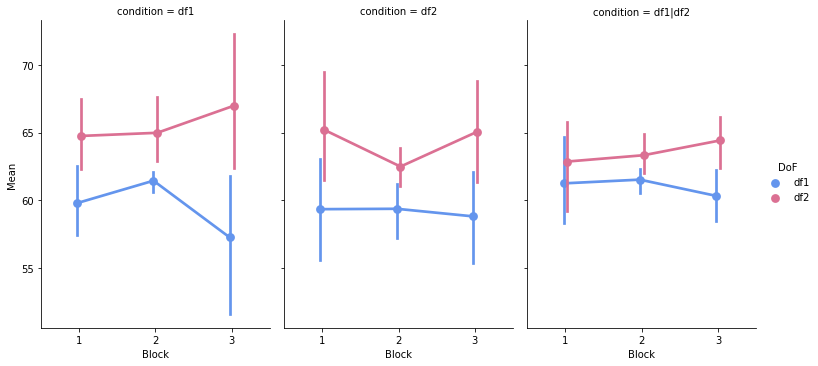

In [75]:
fig_dof_line2 = sns.catplot(x="Block", y="Mean", hue="DoF", col="condition", col_order=condition_display_order, data=df_block_stats_long.rename(columns={'mean': 'Mean', 'block': 'Block', 'dof': 'DoF'}), kind="point", dodge=True, width=10, aspect=.7, palette={'df1': 'cornflowerblue','df2': 'palevioletred'})

fig_filepath = figures_path / 'line-plot-dof_mean.pdf'
plt.savefig(str(fig_filepath))
logging.info(f"Written figure to {fig_filepath.resolve()}")

In [76]:
fig_dof_violin = plot.generate_violin_figure(df_block_stats.rename(columns={'df1 mean': 'df1', 'df2 mean': 'df2'}), columns=['df1', 'df2'], ytitle='Mean', legend_title="DOF", width=800, height=300)
fig_dof_violin.show()

## Save Reports

In [77]:
reports_path = Path('../reports')
# Save descriptive statistics for onset, duration, final states.
out_file = reports_path / 'onset_table.tex'
onset_tab = onset_stats.T.rename_axis(["Task", "DoF"]).reset_index()
onset_tab['DoF'] = onset_tab['DoF'].str.split('_').apply(pd.Series)[0]
onset_tab.to_latex(out_file, caption="Onset (s) of Slider Use", label="tab:Onset", float_format="%.2f", index=False)
logging.info(f"Written report to {out_file.resolve()}")
# Flatten multiindex for saving in CSV.
onset_stats.index.rename('statistic', inplace=True)
onset_stats.columns = ["-".join(i) for i in onset_stats.columns.to_flat_index()]
out_file = reports_path / 'onset_stats.csv'
onset_stats.to_csv(out_file)
logging.info(f"Written report to {out_file.resolve()}")

out_file = reports_path / 'duration_table.tex'
duration_tab = duration_stats.T.rename_axis(["Task", "DoF"]).reset_index()
duration_tab['DoF'] = duration_tab['DoF'].str.split('_').apply(pd.Series)[0]
duration_tab.to_latex(out_file, caption="Duration (s) of Slider Use", label="tab:Duration", float_format="%.2f", index=False)
logging.info(f"Written report to {out_file.resolve()}")
# CSV
duration_stats.index.rename('statistic', inplace=True)
duration_stats.columns = ["-".join(i) for i in duration_stats.columns.to_flat_index()]
out_file = reports_path / 'duration_stats.csv'
duration_stats.to_csv(out_file)
logging.info(f"Written report to {out_file.resolve()}")
# TeX
out_file = reports_path / 'final_state_stats.tex'
final_state_stats.to_latex(out_file, caption="Descriptive Statistics of Final States", label="tab:FinalStates", float_format="%.2f")
logging.info(f"Written report to {out_file.resolve()}")
# CSV
final_state_stats = final_state_stats.T.rename_axis(("statistic", "dof"))
out_file = reports_path / 'final_state_stats.csv'
final_state_stats.to_csv(out_file)
logging.info(f"Written report to {out_file.resolve()}")

# Save figures.

# Violin plots.
fig_filepath = figures_path / 'violin-dof_onset.pdf'
fig_onset.write_image(str(fig_filepath))
logging.info(f"Written figure to {fig_filepath.resolve()}")

fig_filepath = figures_path / 'violin-dof_duration.pdf'
fig_duration.write_image(str(fig_filepath))
logging.info(f"Written figure to {fig_filepath.resolve()}")

fig_filepath = figures_path / 'violin-dof_mean.pdf'
fig_dof_violin.write_image(str(fig_filepath))
logging.info(f"Written figure to {fig_filepath.resolve()}")
# QQ-Plots
fig_filepath = figures_path / 'qq-plot-dof.pdf'
fig_qq_dof.write_image(str(fig_filepath))
logging.info(f"Written figure to {fig_filepath.resolve()}")
# Line-Plots
fig_filepath = figures_path / 'line-plot-dof_mean_by_user.pdf'
fig_dof_line.write_image(str(fig_filepath))
logging.info(f"Written figure to {fig_filepath.resolve()}")

# Histograms
for hist_name, fig in histograms.items():
    fig_filepath = figures_path / f'histogram-{hist_name.replace("|", "-")}.pdf'
    fig.write_image(str(fig_filepath))
    logging.info(f"Written figure to {fig_filepath.resolve()}")

INFO:root:Written report to /home/olaf/code/NeuroPsyResearchAnalysis/reports/onset_table.tex
INFO:root:Written report to /home/olaf/code/NeuroPsyResearchAnalysis/reports/onset_stats.csv
INFO:root:Written report to /home/olaf/code/NeuroPsyResearchAnalysis/reports/duration_table.tex
INFO:root:Written report to /home/olaf/code/NeuroPsyResearchAnalysis/reports/duration_stats.csv
INFO:root:Written report to /home/olaf/code/NeuroPsyResearchAnalysis/reports/final_state_stats.csv
INFO:root:Written figure to /home/olaf/code/NeuroPsyResearchAnalysis/reports/figures/violin-dof_onset.pdf
INFO:root:Written figure to /home/olaf/code/NeuroPsyResearchAnalysis/reports/figures/violin-dof_duration.pdf
INFO:root:Written figure to /home/olaf/code/NeuroPsyResearchAnalysis/reports/figures/violin-dof_mean.pdf
INFO:root:Written figure to /home/olaf/code/NeuroPsyResearchAnalysis/reports/figures/qq-plot-dof.pdf
INFO:root:Written figure to /home/olaf/code/NeuroPsyResearchAnalysis/reports/figures/line-plot-dof_mea